/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Predicted next week's closing price for Bitcoin: 67036.8784999999


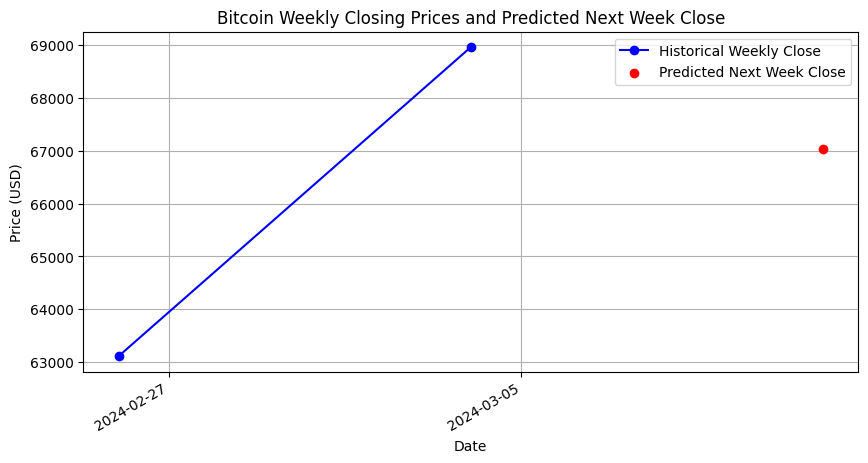

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.ensemble import RandomForestRegressor

# Load the dataset
df = pd.read_csv('/content/BTCUSDT_W1.csv')

# Convert the 'datetime' column to datetime objects
df['datetime'] = pd.to_datetime(df['datetime'])

# Set the 'datetime' column as the index
df.set_index('datetime', inplace=True)

# Resample the data to weekly frequency, taking the mean of 'close' for the week
df_weekly = df['close']

# Create a new DataFrame for features and target
# Shift the weekly prices to create the 'previous_week' feature
df_weekly_features = pd.DataFrame({
    'previous_week': df_weekly.shift(1)
})

# Drop the NaN values that were created by shifting
df_weekly_features.dropna(inplace=True)

# The target is the current week's price, aligned with the features DataFrame
y = df_weekly.loc[df_weekly_features.index]

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the historical data
rf.fit(df_weekly_features, y)

# Predict the next week's closing price using the latest data point
last_week_data = df_weekly_features.iloc[-1].values.reshape(1, -1)
predicted_price = rf.predict(last_week_data)
print(f"Predicted next week's closing price for Bitcoin: {predicted_price[0]}")

# Select the last two weeks of historical data for plotting
historical_data_to_plot = df_weekly[-2:]

# Plot the historical weekly closing prices for the last two weeks
plt.figure(figsize=(10, 5))
plt.plot(historical_data_to_plot.index, historical_data_to_plot, label='Historical Weekly Close', color='blue', marker='o')

# Plot the predicted next week's closing price
next_week_date = historical_data_to_plot.index[-1] + pd.Timedelta(weeks=1)
plt.scatter(next_week_date, predicted_price, color='red', label='Predicted Next Week Close', zorder=5)

# Customize the plot
plt.title('Bitcoin Weekly Closing Prices and Predicted Next Week Close')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)

# Format the x-axis to show the date
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator())
plt.gcf().autofmt_xdate() # Rotation

# Show the plot
plt.show()
